In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

In [2]:
df=pd.read_csv('British_Airways.csv')

In [3]:
df.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,NaN,3.0,3,yes,7.0,I virtually gave up on British Airways about...
1,✅ Trip Verified,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,NaN,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Miami to Budapest via London,November 2022,2.0,3.0,3.0,4.0,NaN,1.0,1,no,1.0,"British Airways is late, their website is at..."
3,✅ Trip Verified,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,1.0,NaN,NaN,4.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1.0,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1901 non-null   object 
 1   aircraft         1787 non-null   object 
 2   travel_type      2654 non-null   object 
 3   travel_class     3422 non-null   object 
 4   route            2650 non-null   object 
 5   date             2646 non-null   object 
 6   seating_comfort  3326 non-null   float64
 7   staff_service    3319 non-null   float64
 8   food_quality     3094 non-null   float64
 9   entertainment    2413 non-null   float64
 10  wifi             505 non-null    float64
 11  ground_service   2588 non-null   float64
 12  value_for_money  3424 non-null   int64  
 13  recommended      3424 non-null   object 
 14  overall_rating   3418 non-null   float64
 15  review           3424 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 428.1+ KB


In [5]:
df.isnull().sum()

status             1523
aircraft           1637
travel_type         770
travel_class          2
route               774
date                778
seating_comfort      98
staff_service       105
food_quality        330
entertainment      1011
wifi               2919
ground_service      836
value_for_money       0
recommended           0
overall_rating        6
review                0
dtype: int64

Removing the columns with no effect in insights (Due to large no of null values)

In [6]:
data=df.drop(['wifi','aircraft','status','ground_service','travel_type','route','date','entertainment'],axis=1)

In [7]:
data.head()

,travel_class,seating_comfort,staff_service,food_quality,value_for_money,recommended,overall_rating,review
0,Business Class,3.0,4.0,4.0,3,yes,7.0,I virtually gave up on British Airways about...
1,Economy Class,4.0,4.0,4.0,4,yes,7.0,I was pleasantly surprised that the airline ...
2,Economy Class,2.0,3.0,3.0,1,no,1.0,"British Airways is late, their website is at..."
3,Premium Economy,3.0,2.0,1.0,2,no,4.0,Flew from Amman to London on Nov. 14 2022. No...
4,Economy Class,1.0,1.0,1.0,1,no,1.0,This is the worst experience I have ever had ...


In [8]:
data.isnull().sum()

travel_class         2
seating_comfort     98
staff_service      105
food_quality       330
value_for_money      0
recommended          0
overall_rating       6
review               0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
SI=SimpleImputer(strategy='most_frequent')

In [11]:
temp=SI.fit_transform(data)

In [12]:
data=pd.DataFrame(temp,columns=data.columns)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   travel_class     3424 non-null   object
 1   seating_comfort  3424 non-null   object
 2   staff_service    3424 non-null   object
 3   food_quality     3424 non-null   object
 4   value_for_money  3424 non-null   object
 5   recommended      3424 non-null   object
 6   overall_rating   3424 non-null   object
 7   review           3424 non-null   object
dtypes: object(8)
memory usage: 214.1+ KB


Converting attributes to their appropriate data types

In [14]:
data['seating_comfort']=data['seating_comfort'].astype('int')
data['staff_service']=data['staff_service'].astype('int')
data['food_quality']=data['food_quality'].astype('int')
data['value_for_money']=data['value_for_money'].astype('int')
data['overall_rating']=data['overall_rating'].astype('int')

In [15]:
data.describe()

,seating_comfort,staff_service,food_quality,value_for_money,overall_rating
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,2.907126,3.334112,2.573014,2.742407,4.847255
std,1.336958,1.489252,1.463525,1.465825,3.159279
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000
50%,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,10.000000


# Analysis

In [16]:
dict1=data['recommended'].value_counts()

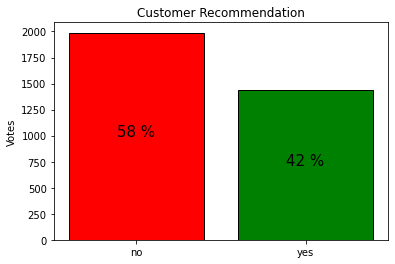

In [17]:
graph1=pt.bar(dict1.index,dict1.values,color=['Red','Green'],edgecolor='black')
for bar in graph1:
    height=bar.get_height()
    pt.annotate(f'{round(height*100/3424)} %',(bar.get_x()+bar.get_width()/2,height/2),ha='center',fontsize=15)
pt.title('Customer Recommendation')
pt.ylabel('Votes')
pt.savefig('customer_recommendation.jpg')
pt.show()

bar graph on ratings

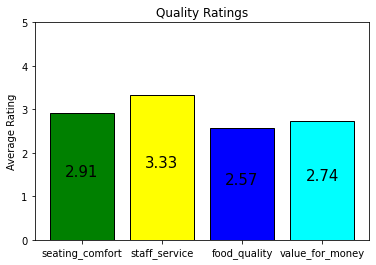

In [18]:
cols=['seating_comfort','staff_service','food_quality','value_for_money']
y=[data[i].mean() for i in cols]
graph2=pt.bar(cols,y,color=['Green','Yellow','Blue','cyan'],edgecolor='black')
for bar in graph2:
    height= bar.get_height()
    pt.annotate(round(height,2),(bar.get_x()+bar.get_width()/2,height/2),ha='center',color='black',fontsize=15)
pt.ylim(0,5)
pt.title('Quality Ratings')
pt.ylabel('Average Rating')
pt.savefig('Quality_Ratings.jpg')
pt.show()

plotting graph for overall rating

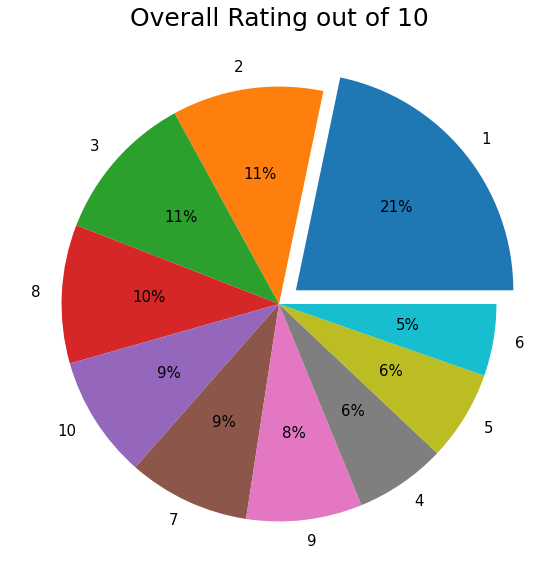

In [19]:
dict2=data['overall_rating'].value_counts()
fig=pt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
pt.pie(dict2.values,labels=dict2.index,autopct='%1.1i%%',explode=[0.1,0,0,0,0,0,0,0,0,0],textprops={'fontsize':15})
pt.title('Overall Rating out of 10',fontsize=25)
pt.savefig('Overall_Rating.jpg')
pt.show()

# Class-Wise analysis

In [20]:
class_wise=data.groupby('travel_class').mean()

In [21]:
class_wise=class_wise.reindex(['Economy Class','Premium Economy','Business Class','First Class']).drop(['overall_rating'],axis='columns')

In [22]:
class_wise

,seating_comfort,staff_service,food_quality,value_for_money
travel_class,,,,
Economy Class,2.777715,3.181353,2.288232,2.658897
Premium Economy,3.047198,3.171091,2.628319,2.746313
Business Class,2.920108,3.511670,2.888689,2.812388
First Class,3.688679,3.929245,3.188679,3.061321


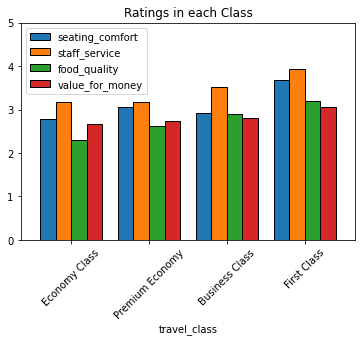

In [23]:
class_wise.plot(kind='bar',edgecolor='black',width=0.8)
pt.xticks(rotation=45)
pt.title("Ratings in each Class")
pt.savefig('Class_Ratings.jpg')
pt.ylim(0,5)
pt.show()

# Sentiment Analysis

In [24]:
reviews=data[['review']]

In [25]:
file1=open('negative-words.txt','r',encoding='latin-1')

In [26]:
negative_words=file1.read().split('\n')
file1.close()

In [27]:
file2=open('positive-words.txt','r',encoding='latin-1')

In [28]:
positive_words=file2.read().split('\n')
file2.close()

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [30]:
stop_words=stopwords.words('english')
lemma=WordNetLemmatizer()

In [31]:
import re
def preprocess(text):
    corpus=re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)
    tokens=word_tokenize(corpus)
    tokens=[i for i in tokens if i not in stop_words]
    tokens=[lemma.lemmatize(i).lower() for i in tokens]
    return tokens

In [32]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
reviews['filtered']=reviews['review'].apply(preprocess)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
def sentiment(corpus):
    pos=len([i for i in corpus if i in positive_words])
    neg=len([i for i in corpus if i in negative_words])
    return pos/(neg+1)

In [35]:
reviews['sentiment_score']=reviews['filtered'].apply(sentiment)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
reviews.sample(5)

,review,filtered,sentiment_score
2438,LHR-PHX 16 Sept. Last few times I've flown Bri...,"[lhr, phx, 16, sept., last, time, i, flown, br...",2.3
1819,London Heathrow to Johannesburg return. Outw...,"[london, heathrow, johannesburg, return, ., ou...",2.5
613,London to Aberdeen. Before boarding the flig...,"[london, aberdeen, ., before, boarding, flight...",4.0
2425,Checked in online for our British Airways flig...,"[checked, online, british, airways, flight, la...",0.5
2727,A short hop from LCY-ZRH. Nice clean Embraer w...,"[a, short, hop, lcy, zrh, ., nice, clean, embr...",6.0


In [37]:
reviews.review.iloc[1294]

"  Malta to Gatwick. This is for British Airways Catering Service Managers. They have invested a lot of time and money into your meal scheme so as to earn extra income rather than give free meals. Initially I was very impressed when I spied the M&S food and drink menu which does merit appreciation. However, on flight BA 2645 from Malta to Gatwick my initial feelings of happiness were swiftly gutted. I am a strict vegetarian so I was happy to see the selection of vegetarian fayre but unfortunately by the time the trolley got to me (a long time I might add) there was no veggie sandwiches, no veggie focaccia, not even mixed nuts (for heavens sake!). Of course there was plenty for the non-vegetarians. Not only that but the Couscous Salad has chicken on it but no veggie alternative. I was very disappointed and BA need to do better. For me to fly with BA again I'd need some assurances that they will care just as much for the veggie people as for the meatheads. "

In [38]:
reviews.sentiment_score.iloc[1294]

2.0

In [39]:
def sentiment(score):
    if score<=1.1 and score>=0.9:
        return 'Neutral'
    if score>1.1:
        return 'Positive'
    return 'Negative'

In [40]:
reviews['sentiment']=reviews['sentiment_score'].apply(sentiment)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
data['sentiment']=reviews['sentiment']

In [42]:
counts=reviews.sentiment.value_counts()

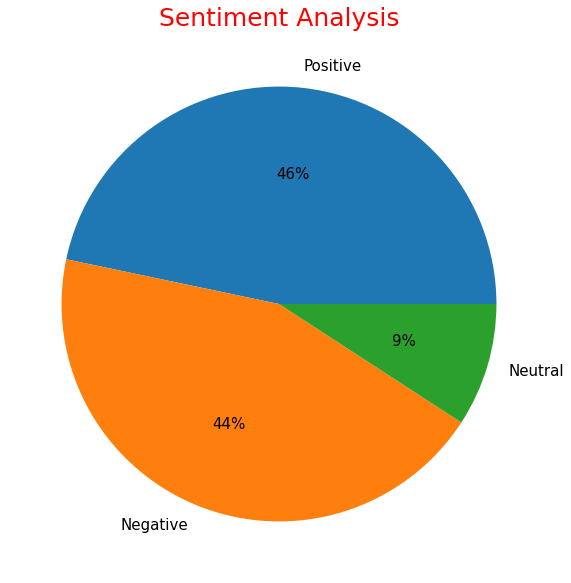

In [43]:
fig=pt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
pt.pie(counts.values,labels=counts.index,autopct='%1.1i%%',textprops={'fontsize':15})
pt.title('Sentiment Analysis',fontsize=25,color='red')
pt.savefig('Sentiment_Analysis.jpg')
pt.show()

# Thank You!!!